In [148]:
# Í∏∞Î≥∏
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Í≤ΩÍ≥† Îú®ÏßÄ ÏïäÍ≤å ÏÑ§Ï†ï
import warnings
warnings.filterwarnings('ignore')

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏïåÍ≥†Î¶¨Ï¶ò
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ÌïôÏäµÏö©Í≥º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú ÎÇòÎàÑÎäî Ìï®Ïàò
from sklearn.model_selection import train_test_split

# ÍµêÏ∞® Í≤ÄÏ¶ù
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# ÌèâÍ∞ÄÌï®Ïàò
# Î∂ÑÎ•òÏö©
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# ÌöåÍ∑ÄÏö©
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Î™®Îç∏Ïùò ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÍ∏∞ ÏúÑÌïú ÎèÑÍµ¨
from sklearn.model_selection import GridSearchCV

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - Î∂ÑÎ•ò
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - ÌöåÍ∑Ä
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor

# ÌïôÏäµ Î™®Îç∏ Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import pickle

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
# data_type = "train"
# month = "07"
# category = "ÏûîÏï°Ï†ïÎ≥¥"

# local
root_path = '../../data'

# colab
# root_path = '/content/drive/MyDrive/12·Ñå·Ö© ·Ñë·Ö°·Ñã·Öµ·ÑÇ·Ö•·ÜØ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/data'

#drive_folder = f'{root_path}/Ïä§ÌÉØÌã∞Ï¶à_Raw_data/'

In [3]:
df1 = pd.read_csv(f'{root_path}/FA_Ìà¨Ïàò_Í∏∞Ï°¥+2025.csv')

In [4]:
# ÏàòÏπòÌòï Ïª¨Îüº ÏûêÎèô ÏÑ†ÌÉù (ID, Ïù¥Î¶Ñ, Íµ¨Î∂Ñ Îì±ÏùÄ Ï†úÏô∏)
stat_cols = df1.select_dtypes(include=['int64', 'float64']).columns.difference(['FAÎÖÑÎèÑ', 'ÌîåÎ†àÏù¥ÎÖÑÎèÑ']).tolist()

# ÏÑ†ÏàòÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
df_stat = df1.groupby('ÏÑ†ÏàòÎ™Ö')[stat_cols].mean().reset_index()

In [5]:
df_cat = (
    df1.sort_values(['ÏÑ†ÏàòÎ™Ö', 'ÌîåÎ†àÏù¥ÎÖÑÎèÑ'])
        .groupby('ÏÑ†ÏàòÎ™Ö')
        .last()
        .reset_index()[['ÏÑ†ÏàòÎ™Ö', 'Ìà¨', 'ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò']]
)

In [6]:
df_final = pd.merge(df_stat, df_cat, on='ÏÑ†ÏàòÎ™Ö', how='left')

- Ìà¨, ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò : ÏõêÌï´ Ïù∏ÏΩîÎî©

In [21]:
df_final['Ìà¨'] = df_final['Ìà¨'].apply(
    lambda x: 'Ïö∞Ìà¨' if 'Ïö∞' in str(x)
    else 'Ï¢åÌà¨'
)

In [23]:
df_encoded = pd.get_dummies(df_final, columns=['Ìà¨', 'ÏÑ∏Î∂Ä Ìè¨ÏßÄÏÖò'], prefix=['Ìà¨', 'Ìè¨ÏßÄÏÖò'])

In [33]:
print(df_encoded.columns.tolist())

['ÏÑ†ÏàòÎ™Ö', '2Î£®ÌÉÄÌóàÏö©', '3Î£®ÌÉÄÌóàÏö©', 'ERA', 'FA Í≥ÑÏïΩ Ïó∞Ïàò', 'FA Í≥ÑÏïΩ Ï¥ùÏï°', 'FIP', 'Í≤åÏûÑÏàò', 'Íµ¨Ïõê WAR', 'Íµ¨Ïõê Ïù¥Îãù', 'Íµ¨ÏõêÎì±Ìåê', 'Íµ≠ÎåÄÏ∂úÏ†ÑÌöüÏàò', 'ÎÇòÏù¥', 'Î≥ºÎÑ∑ÌóàÏö©', 'Î∏îÎ°†ÏÑ∏Ïù¥Î∏å', 'ÏÇ¨Íµ¨ÌóàÏö©', 'ÏÇ¨ÏÇ¨Íµ¨', 'ÏÑ†Î∞ú WAR', 'ÏÑ†Î∞ú Ïù¥Îãù', 'ÏÑ†Î∞úÎì±Ìåê', 'ÏÑ∏Ïù¥Î∏å', 'ÏäπÎ¶¨', 'Ïó∞Î¥â', 'ÏôÑÎ¥â', 'ÏôÑÌà¨', 'ÏõêÌÅ¥ÎüΩÎß®Ïó¨Î∂Ä', 'Ïù¥ÎãùÏàò', 'ÏûêÏ±ÖÏ†ê', 'Ï¢ÖÌï© WAR', 'ÌÉàÏÇºÏßÑ', 'Ìà¨Íµ¨Ïàò', 'Ìå®Ï†Ñ', 'Ìè≠Ìà¨', 'ÌîºÏïàÌÉÄ', 'ÌîºÏû•ÌÉÄÏú®', 'ÌîºÌôàÎü∞', 'ÌôÄÎìú', 'Ìà¨_Ïö∞Ìà¨', 'Ìà¨_Ï¢åÌà¨', 'Ìè¨ÏßÄÏÖò_CP', 'Ìè¨ÏßÄÏÖò_RP', 'Ìè¨ÏßÄÏÖò_SP']


In [47]:
# Í≥ÑÏïΩ Ïó∞ÏàòÍ∞Ä 0Ïù¥Í±∞ÎÇò Í≤∞Ï∏°Ïù∏ Í≤ΩÏö∞ Ï†úÏô∏
df_encoded = df_encoded[df_encoded['FA Í≥ÑÏïΩ Ïó∞Ïàò'] > 0].copy()

# AAV Îã§Ïãú Í≥ÑÏÇ∞
df_encoded['AAV'] = df_encoded['FA Í≥ÑÏïΩ Ï¥ùÏï°'] / df_encoded['FA Í≥ÑÏïΩ Ïó∞Ïàò']

- Feature importance

In [85]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X = df_encoded.drop(columns=['AAV', 'ÏÑ†ÏàòÎ™Ö', 'FA Í≥ÑÏïΩ Ï¥ùÏï°'])
y = df_encoded['AAV']

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏

In [90]:
# 1Ô∏è‚É£ Î™®Îç∏ Ï†ïÏùò & ÌïôÏäµ
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [92]:
# 2Ô∏è‚É£ ÏòàÏ∏° & ÌèâÍ∞Ä
y_pred_rf = rf_model.predict(X_val)
rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
r2_rf = r2_score(y_val, y_pred_rf)
mes_rf = np.mean(y_pred_rf - y_val)  # ÌèâÍ∑† Ïò§Ï∞® (ÏòàÏ∏° - Ïã§Ï†ú)


# Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ [Random Forest]")
print(f"   RMSE: {rmse_rf:,.0f} Ïõê")
print(f"   R¬≤:   {r2_rf:.4f}")
print(f"   MES:  {mes_rf:.4f} Ïõê")

‚úÖ [Random Forest]
   RMSE: 29,939 Ïõê
   R¬≤:   0.7923
   MES:  8506.1111 Ïõê


In [107]:
# 3Ô∏è‚É£ feature importance ÏãúÍ∞ÅÌôî
feat_imp_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp_rf.head(10)[::-1].plot(kind='barh')
plt.title("Random Forest - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## LGBM

In [97]:
# 1Ô∏è‚É£ Î™®Îç∏ Ï†ïÏùò & ÌïôÏäµ
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 58, number of used features: 34
[LightGBM] [Info] Start training from score 87706.896720
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

LGBMRegressor(random_state=42)

In [101]:
# 2Ô∏è‚É£ ÏòàÏ∏° & ÌèâÍ∞Ä
y_pred_lgbm = lgbm_model.predict(X_val)
rmse_lgbm = mean_squared_error(y_val, y_pred_lgbm, squared=False)
r2_lgbm = r2_score(y_val, y_pred_lgbm)
mes_lgbm = np.mean(y_pred_lgbm - y_val)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ [LGBM]")
print(f"   RMSE: {rmse_lgbm:,.0f} Ïõê")
print(f"   R¬≤:   {r2_lgbm:.4f}")
print(f"   MES:  {mes_lgbm:.4f} Ïõê")

‚úÖ [LGBM]
   RMSE: 40,408 Ïõê
   R¬≤:   0.6217
   MES:  5131.3913 Ïõê


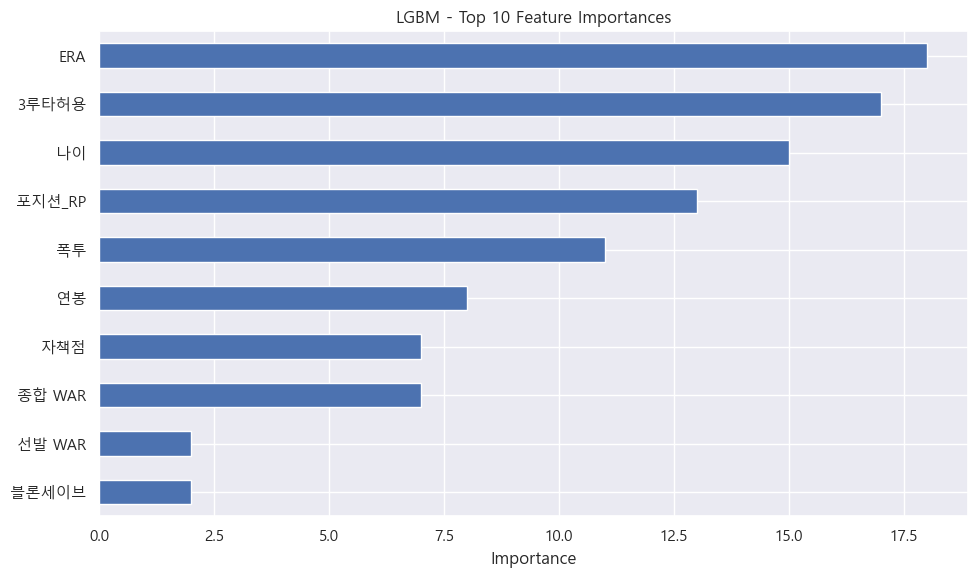

In [130]:
feat_imp_lgbm = pd.Series(lgbm_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp_lgbm.head(10)[::-1].plot(kind='barh')
plt.title("LGBM - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## XGBoost

In [110]:
# 1Ô∏è‚É£ Î™®Îç∏ Ï†ïÏùò & ÌïôÏäµ
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [112]:
# 2Ô∏è‚É£ ÏòàÏ∏° & ÌèâÍ∞Ä
y_pred_xgb = xgb_model.predict(X_val)

rmse_xgb = mean_squared_error(y_val, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_val, y_pred_xgb)
mes_xgb = np.mean(y_pred_xgb - y_val)

# Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ [XGBoost]")
print(f"   RMSE: {rmse_xgb:,.0f} Ïõê")
print(f"   R¬≤:   {r2_xgb:.4f}")
print(f"   MES:  {mes_xgb:.4f} Ïõê")

‚úÖ [XGBoost]
   RMSE: 36,675 Ïõê
   R¬≤:   0.6884
   MES:  10044.3065 Ïõê


In [114]:
feat_imp_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp_xgb.head(10)[::-1].plot(kind='barh')
plt.title("üéØ XGBoost - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## CatBoost

In [136]:
# 1Ô∏è‚É£ Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

In [138]:
# 2Ô∏è‚É£ ÏòàÏ∏° & ÌèâÍ∞Ä
y_pred_cat = cat_model.predict(X_val)
rmse_cat = mean_squared_error(y_val, y_pred_cat, squared=False)
r2_cat = r2_score(y_val, y_pred_cat)
mes_cat = np.mean(y_pred_cat - y_val)

# Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ [CatBoost]")
print(f"   RMSE: {rmse_cat:,.0f} Ïõê")
print(f"   R¬≤:   {r2_cat:.4f}")
print(f"   MES:  {mes_cat:.4f} Ïõê")

‚úÖ [CatBoost]
   RMSE: 35,605 Ïõê
   R¬≤:   0.7063
   MES:  5972.8135 Ïõê


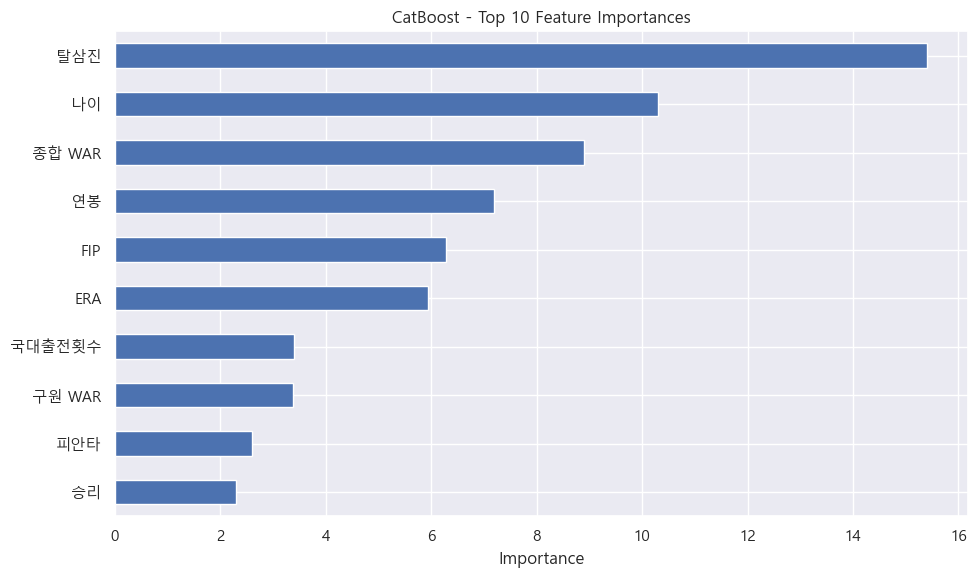

In [150]:
# 3Ô∏è‚É£ Feature Importance
cat_importance = pd.Series(cat_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
cat_importance[::-1].plot(kind='barh')
plt.title("CatBoost - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

## Stacking Regressor (RF + LGBM + XGB ‚Üí Ridge)

In [163]:
# 1Ô∏è‚É£ Íµ¨ÏÑ± Î™®Îç∏Îì§
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42)),
    ('cat', CatBoostRegressor(verbose=0, random_state=42))
]

In [166]:
# 2Ô∏è‚É£ Ïä§ÌÉúÌÇπ Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(),
    n_jobs=-1
)
stack_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('lgbm', LGBMRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            fea...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x0000025EA835D130>)],
                  final_estimator=Ridge(), n_jobs=-1)

In [168]:
# 3Ô∏è‚É£ ÏòàÏ∏° & ÌèâÍ∞Ä
y_pred_stack = stack_model.predict(X_val)
rmse_stack = mean_squared_error(y_val, y_pred_stack, squared=False)
r2_stack = r2_score(y_val, y_pred_stack)
mes_stack = np.mean(y_pred_stack - y_val)

print("‚úÖ [Stacking Regressor]")
print(f"   RMSE: {rmse_stack:,.0f} Ïõê")
print(f"   R¬≤:   {r2_stack:.4f}")
print(f"   MES:  {mes_stack:.4f} Ïõê")

‚úÖ [Stacking Regressor]
   RMSE: 31,824 Ïõê
   R¬≤:   0.7654
   MES:  13335.8589 Ïõê


## SHAP Î∂ÑÏÑù (LGBM)

In [171]:
import shap

In [179]:
# 1Ô∏è‚É£ Explainer 
explainer = shap.TreeExplainer(lgbm_model)

In [185]:
# 2Ô∏è‚É£ SHAP Í∞í Í≥ÑÏÇ∞
shap_values = explainer.shap_values(X_val)

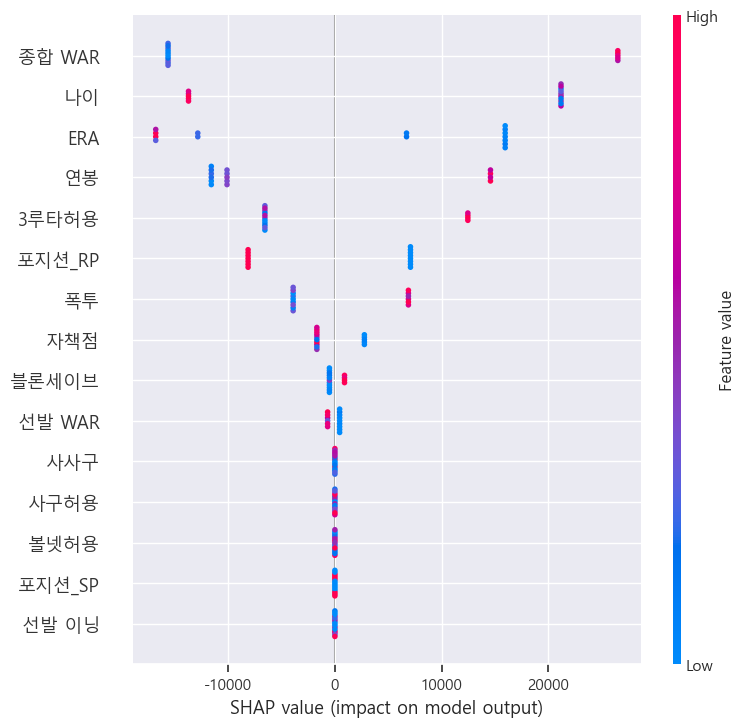

In [187]:
# 3Ô∏è‚É£ summary plot (Ï†ÑÏ≤¥ ÌäπÏÑ± ÏòÅÌñ•ÎèÑ ÏãúÍ∞ÅÌôî)
shap.summary_plot(shap_values, X_val, max_display=15)

In [189]:
# waterfall plotÏùÄ Í∞úÎ≥Ñ ÏòàÏ∏°Ïóê ÎåÄÌïú ÏÑ§Î™ÖÏö©
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_val.iloc[0])

In [191]:
# ÏµúÏã† SHAPÏóêÏÑúÎäî waterfallÏù¥ ÏòàÏÅòÍ≥† ÏßÅÍ¥ÄÏ†Å
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names=X_val.columns)

In [197]:
# 1. best_model ÏßÄÏ†ï
best_model = lgbm_model  # ÎòêÎäî cat_model

# 2. Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
df_encoded['AAV_pred'] = best_model.predict(X)

# 3. Ïò§Ï∞® Í≥ÑÏÇ∞
df_encoded['AAV_gap'] = df_encoded['AAV_pred'] - df_encoded['AAV']

# 4. Í≥ºÎåÄÌèâÍ∞Ä TOP 5
print("üìà Í≥ºÎåÄÌèâÍ∞Ä ÏÑ†Ïàò TOP5")
display(df_encoded.sort_values('AAV_gap', ascending=False)[['ÏÑ†ÏàòÎ™Ö', 'AAV', 'AAV_pred', 'AAV_gap']].head())

# 5. Í≥ºÏÜåÌèâÍ∞Ä TOP 5
print("üìâ Í≥ºÏÜåÌèâÍ∞Ä ÏÑ†Ïàò TOP5")
display(df_encoded.sort_values('AAV_gap')[['ÏÑ†ÏàòÎ™Ö', 'AAV', 'AAV_pred', 'AAV_gap']].head())

üìà Í≥ºÎåÄÌèâÍ∞Ä ÏÑ†Ïàò TOP5


ÏÑ†ÏàòÎ™Ö      AAV       AAV_pred       AAV_gap
65   Ï£ºÍ∂å  40000.0  109329.397120  69329.397120
0   Í∞ïÏòÅÏãù  42500.0  109471.557798  66971.557798
24  Î∞∞ÏòÅÏàò  70000.0  121870.030654  51870.030654
63  Ï†ïÏ∞¨Ìóå  43000.0   92849.355776  49849.355776
49  Ïù¥Ïû¨Ìïô  30000.0   78104.517170  48104.517170

üìâ Í≥ºÏÜåÌèâÍ∞Ä ÏÑ†Ïàò TOP5


ÏÑ†ÏàòÎ™Ö            AAV       AAV_pred       AAV_gap
4   Íµ¨Ï∞ΩÎ™®  208333.333333  144356.244579 -63977.088754
27  ÏÜêÏäπÎùΩ  150000.000000   96839.869170 -53160.130830
43  Ïú§ÏÑùÎØº  225000.000000  178756.356601 -46243.643399
34  ÏóÑÏÉÅÎ∞±  195000.000000  152578.294238 -42421.705762
17  ÎÖ∏Í≤ΩÏùÄ   83333.333333   42311.133166 -41022.200167